In [1]:
# ![ ! -d "SIA-TPs" ] && git clone https://github.com/Fpannunzio/SIA-TPs.git
# ! pip install -r SIA-TPs/TP4/requirements.txt

In [2]:
import os
import sys

# basePath = 'SIA-TPs/TP4'
basePath = '.'

module_path = os.path.abspath(os.path.join(basePath))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas
from konohen_plot import plot_map, plot_map_with_countries, plot_max_weight
from config_to_grid import get_grid, get_normalized_values
from kohonen_grid import KohonenGrid
import numpy as np

In [4]:
gridParams = {
    'connection': 'hexagonal',
    'distance_function': 'euclidean',
    'radius': 2,
    'learning_rate': 0.05,
    'k': 9
}
europe: pandas.DataFrame = pandas.read_csv(basePath + '/' + 'europe.csv')
countries: np.ndarray = europe.values[:, 0]
values = get_normalized_values(basePath + '/' + 'europe.csv')
iterations = len(values) * 1

In [5]:
grid: KohonenGrid = get_grid(gridParams, len(values[0]))
grid.train(iterations, values)

### Prediccion para cada uno de los paises despues de terminar el entrenamiento

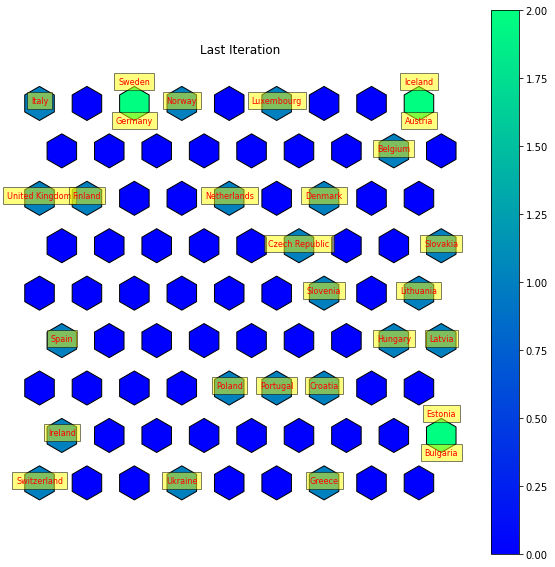

In [6]:
hits_count = np.histogram(grid.predict(values), bins=gridParams['k'] ** 2)[0]

countryDf = pandas.DataFrame(data=countries, columns=['country'])
hitDf = pandas.DataFrame(data=grid.predict(values), columns=['hits'])
countriesAndHits = pandas.concat([countryDf, hitDf], axis = 1)

plot_map_with_countries(countriesAndHits, gridParams['k'], 'winter', 'Last Iteration')

### Distancia media de cada hexagono con sus vecinos

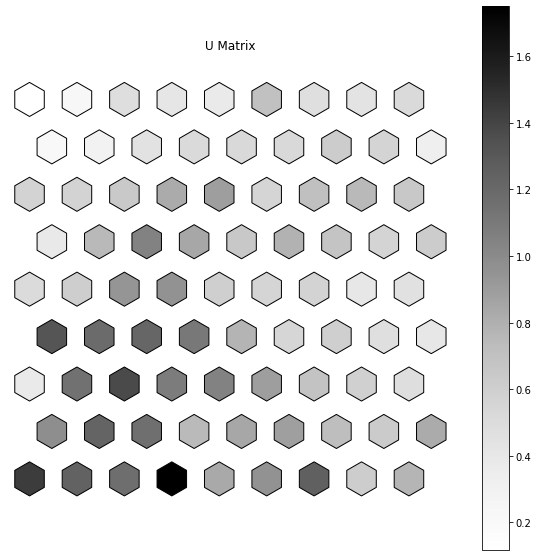

In [7]:
matrix: np.ndarray = grid.get_near_neurons_mean_distances_matrix()
plot_map(matrix.flatten(), gridParams['k'], 'Greys', 'U Matrix')

In [8]:
weights = np.empty((gridParams['k']**2, np.size(values, 1)))
training_winning_count = np.empty((gridParams['k']**2))
i = 0
for row in grid.grid:
    for neuron in row:
        weights[i] = neuron.w
        training_winning_count[i] = neuron.training_winning_count
        i += 1

### Total de matches durante el entrenamiento

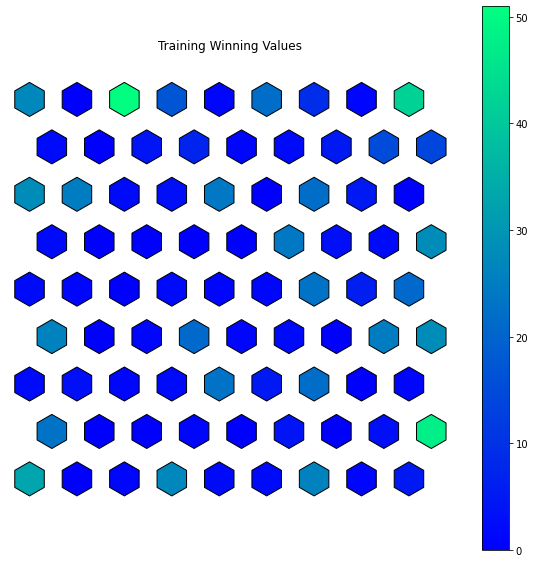

In [9]:
plot_map(training_winning_count, gridParams['k'], 'winter', 'Training Winning Values')

### Peso maximo de cada neurona

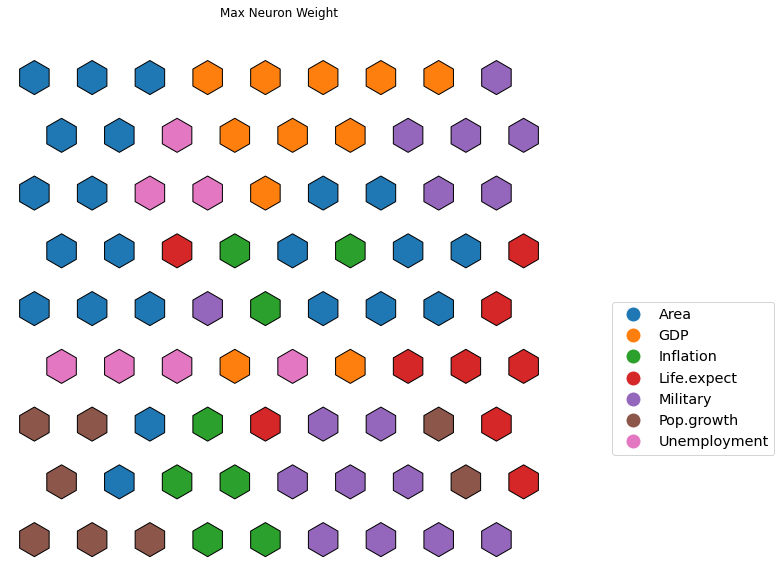

In [10]:
max_training_weight_index = np.argmax(np.abs(weights), axis=1)
plot_max_weight(max_training_weight_index, europe.columns.values[1:], gridParams['k'], 'winter', 'Max Neuron Weight')

### Grafico de feature

In [11]:
pandas.DataFrame(data=[range(np.size(values, 1))], columns=europe.columns.values[1:])

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,0,1,2,3,4,5,6


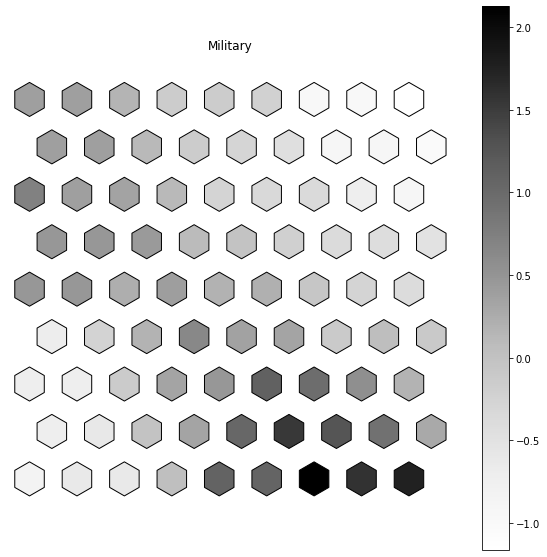

In [12]:
feature_index = 4

plot_map(weights[:, feature_index], gridParams['k'], 'Greys', europe.columns.values[feature_index + 1])